In [1]:
import os
import io
import re
import numpy as np

def import_data():
    ham_list = []
    spam_list = []

    for filename in os.listdir("./data/email/ham/"):
        f = open("./data/email/ham/" + filename, mode="r", encoding="latin-1")
        ham_list.append(f.read())

    for filename in os.listdir("./data/email/spam/"):
        f = open("./data/email/spam/" + filename, mode="r", encoding="latin-1")
        spam_list.append(f.read())
    return ham_list, spam_list  

def textParse(bigString):
    listOfTokens = re.split('\W+', bigString)
    regex = re.compile('[0-9]+')  # filter out words with numbers
    return [tok.lower() for tok in listOfTokens if (len(tok) > 2 and not regex.search(tok))]   

def createDataSet(ham_list, spam_list):
    train_ham_list = ham_list[:len(ham_list)*8//10]
    test_ham_list = ham_list[len(ham_list)*8//10:]
    train_spam_list = spam_list[:len(spam_list)*8//10]
    test_spam_list = spam_list[len(spam_list)*8//10:]
    listOfPost = []
    listOfClass = []
    listOfTestPost = []
    listOfTestClass = []
    for post in train_ham_list:
        listOfPost.append(post)
        listOfClass.append(0) # 0 is ham, 1 is spam
    for post in train_spam_list:
        listOfPost.append(post)
        listOfClass.append(1)
    for post in test_ham_list:
        listOfTestPost.append(post)
        listOfTestClass.append(0) 
    for post in test_spam_list:
        listOfTestPost.append(post)
        listOfTestClass.append(1)
    # todo: shuffle list
    return listOfPost, listOfClass, listOfTestPost, listOfTestClass

In [2]:
ham_list, spam_list = import_data()
listOfPost, listOfClass,listOfTestPost, testClass = createDataSet(ham_list, spam_list)

In [3]:
# vectorize documents
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [4]:
model.fit(listOfPost, listOfClass)
labels = model.predict(listOfTestPost)

Text(89.18, 0.5, 'predicted label')

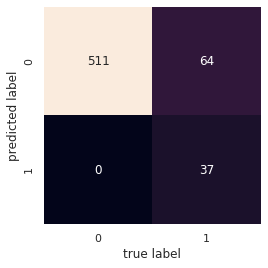

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(testClass, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [6]:
mat

array([[511,   0],
       [ 64,  37]])

In [7]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1E10)
model.fit(listOfPost, listOfClass)

ValueError: could not convert string to float: 'From rpm-list-admin@freshrpms.net  Thu Sep 19 13:02:12 2002\nReturn-Path: <rpm-zzzlist-admin@freshrpms.net>\nDelivered-To: yyyy@localhost.example.com\nReceived: from localhost (jalapeno [127.0.0.1])\n\tby jmason.org (Postfix) with ESMTP id 5E12716F03\n\tfor <jm@localhost>; Thu, 19 Sep 2002 13:02:11 +0100 (IST)\nReceived: from jalapeno [127.0.0.1]\n\tby localhost with IMAP (fetchmail-5.9.0)\n\tfor jm@localhost (single-drop); Thu, 19 Sep 2002 13:02:11 +0100 (IST)\nReceived: from egwn.net (ns2.egwn.net [193.172.5.4]) by\n    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g8JApkC16151 for\n    <jm-rpm@jmason.org>; Thu, 19 Sep 2002 11:51:47 +0100\nReceived: from auth02.nl.egwn.net (localhost [127.0.0.1]) by egwn.net\n    (8.11.6/8.11.6/EGWN) with ESMTP id g8JAn3f17228; Thu, 19 Sep 2002 12:49:03\n    +0200\nReceived: from zeus.scania.co.za ([196.41.10.170]) by egwn.net\n    (8.11.6/8.11.6/EGWN) with ESMTP id g8JAmHf13834 for\n    <rpm-list@freshrpms.net>; Thu, 19 Sep 2002 12:48:18 +0200\nReceived: from leenx.co.za ([10.1.1.130]) by zeus.scania.co.za\n    (8.11.6/8.11.2) with ESMTP id g8JAgWC10724 for <rpm-list@freshrpms.net>;\n    Thu, 19 Sep 2002 12:42:36 +0200\nMessage-Id: <3D89AA17.4090005@leenx.co.za>\nFrom: "C.Lee Taylor" <leet@leenx.co.za>\nOrganization: LeeNX\nUser-Agent: Mozilla/5.0 (X11; U; Linux i686; en-US; rv:1.0.0) Gecko/20020607\nX-Accept-Language: en-us, en\nMIME-Version: 1.0\nTo: rpm-zzzlist@freshrpms.net\nSubject: Re: --with ...\nReferences: <20020919100001.21684.81501.Mailman@auth02>\nContent-Type: text/plain; charset=us-ascii; format=flowed\nContent-Transfer-Encoding: 7bit\nX-Mailscanner: Found to be clean, Found to be clean, Found to be clean\nSender: rpm-zzzlist-admin@freshrpms.net\nErrors-To: rpm-zzzlist-admin@freshrpms.net\nX-Beenthere: rpm-zzzlist@freshrpms.net\nX-Mailman-Version: 2.0.11\nPrecedence: bulk\nReply-To: rpm-zzzlist@freshrpms.net\nList-Help: <mailto:rpm-zzzlist-request@freshrpms.net?subject=help>\nList-Post: <mailto:rpm-zzzlist@freshrpms.net>\nList-Subscribe: <http://lists.freshrpms.net/mailman/listinfo/rpm-zzzlist>,\n    <mailto:rpm-list-request@freshrpms.net?subject=subscribe>\nList-Id: Freshrpms RPM discussion list <rpm-zzzlist.freshrpms.net>\nList-Unsubscribe: <http://lists.freshrpms.net/mailman/listinfo/rpm-zzzlist>,\n    <mailto:rpm-list-request@freshrpms.net?subject=unsubscribe>\nList-Archive: <http://lists.freshrpms.net/pipermail/rpm-zzzlist/>\nX-Original-Date: Thu, 19 Sep 2002 12:42:31 +0200\nDate: Thu, 19 Sep 2002 12:42:31 +0200\nX-Spam-Status: No, hits=-2.1 required=5.0\n\ttests=KNOWN_MAILING_LIST,NOSPAM_INC,REFERENCES,USER_AGENT,\n\t      USER_AGENT_MOZILLA_UA,X_ACCEPT_LANG\n\tversion=2.50-cvs\nX-Spam-Level: \n\nGreetings ...\n\n> PS: Yup, I\'m back from my holidays ;-)\n\tI hope you did not miss us at all ... ;-0\n\n > I think I\'ll use this "--with <whatever>" switch more and more where\n > possible.\n\tMmm, great stuff ... Now to get the RedHat Samba packager to do the same \nthing ...\n\n\tI have used there spec file and fun a few problems in it, and one of them \nwas just hashing out things for other use ...\n\n\tNow to get to grips with the Kernel ... still have not found and easy way to \nrebuild the Kernel without having to wait and hour for it to generate the \nheaders for all arch ... arrrrhhhh ...\n\nMailed\nLee\n\n\n_______________________________________________\nRPM-List mailing list <RPM-List@freshrpms.net>\nhttp://lists.freshrpms.net/mailman/listinfo/rpm-list\n\n\n'

In [9]:
listOfPost

['From rpm-list-admin@freshrpms.net  Thu Sep 19 13:02:12 2002\nReturn-Path: <rpm-zzzlist-admin@freshrpms.net>\nDelivered-To: yyyy@localhost.example.com\nReceived: from localhost (jalapeno [127.0.0.1])\n\tby jmason.org (Postfix) with ESMTP id 5E12716F03\n\tfor <jm@localhost>; Thu, 19 Sep 2002 13:02:11 +0100 (IST)\nReceived: from jalapeno [127.0.0.1]\n\tby localhost with IMAP (fetchmail-5.9.0)\n\tfor jm@localhost (single-drop); Thu, 19 Sep 2002 13:02:11 +0100 (IST)\nReceived: from egwn.net (ns2.egwn.net [193.172.5.4]) by\n    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g8JApkC16151 for\n    <jm-rpm@jmason.org>; Thu, 19 Sep 2002 11:51:47 +0100\nReceived: from auth02.nl.egwn.net (localhost [127.0.0.1]) by egwn.net\n    (8.11.6/8.11.6/EGWN) with ESMTP id g8JAn3f17228; Thu, 19 Sep 2002 12:49:03\n    +0200\nReceived: from zeus.scania.co.za ([196.41.10.170]) by egwn.net\n    (8.11.6/8.11.6/EGWN) with ESMTP id g8JAmHf13834 for\n    <rpm-list@freshrpms.net>; Thu, 19 Sep 2002 12:48:18 +0200